In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 281s 2us/step


In [16]:
x_train.shape

(50000, 32, 32, 3)

In [17]:
x_train[0].shape

(32, 32, 3)

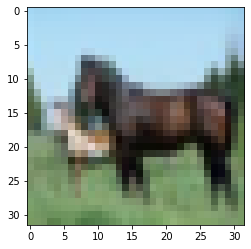

In [21]:
plt.imshow(x_train[12])